# Flattening the COVID-19 Curve



### Context

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Individual level data comes from covid19india


### Inspiration

Looking for data based suggestions to stop / delay the spread of virus


### Acknowledgements


Thanks to Indian Ministry of Health & Family Welfare for making the data available to general public.

Thanks to covid19india.org for making the individual level details and testing details available to general public.

Thanks to Wikipedia for population information.

Photo Courtesy - https://hgis.uw.edu/virus/

In [1]:
#Importing required packages

import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import pandas as pd
import tarfile
from six.moves import urllib

Note : All data files for this notebook are under timeseries/ directory

### Initialising the data

Data Source : https://github.com/CSSEGISandData/COVID-19/

Last Data update : 7:49 am, April 23, 2020

Now we will load the separate time series data files for confirmed cases, deaths reported and recovered cases. 


In [2]:
confirmed_cases = pd.read_csv('/home/yash/projects/prediction_project/timeseries/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25


In [3]:
deaths_reported = pd.read_csv('/home/yash/projects/prediction_project/timeseries/time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [4]:
recovered_cases = pd.read_csv('/home/yash/projects/prediction_project/timeseries/time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,40,43,54,99,112,131,135,150,166
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,232,248,251,277,283,302,314,327,345,356
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,601,691,708,783,846,894,1047,1099,1152,1204
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,169,169,191,205,235,248,282,309
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,5,5,5,6,6,6,6,6


In [5]:
#Collecting all columns from confirmed_cases
conf_cols = confirmed_cases.keys()
conf_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [6]:
confirmed = confirmed_cases.loc[:, conf_cols[4]:conf_cols[-1]]

In [7]:
deaths = deaths_reported.loc[:, conf_cols[4]:conf_cols[-1]]

In [8]:
recoveries = recovered_cases.loc[:, conf_cols[4]:conf_cols[-1]]

In [9]:
#check if extraction completed properly
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,0,0,0,0,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,0,0,0,0,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25


Now we will find the total number of confirmed cases, deaths and recovered cases and append them to their lists via a loop.
Also, we will calculate mortality rate.

#### Mortality Rate = (total number of deaths) / (total number of confirmed cases)

In [10]:
#initializing lists

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

In [11]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum

2623413

In [13]:
death_sum

183025

In [14]:
recovered_sum

709694

In [15]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145205,
 156101,
 167454,
 181574,
 197102,
 214821,
 242570,
 272208,
 304507,
 336953,
 378231,
 418041,
 467653,
 529591,
 593291,
 660693,
 720140,
 782389,
 857487,
 932475,
 1013326,
 1095698,
 1175857,
 1249484,
 1321131,
 1396092,
 1479804,
 1565278,
 1657526,
 1735650,
 1834721,
 1904838,
 1976191,
 2056054,
 2152437,
 2240190,
 2317758,
 2401101,
 2472258,
 2549293,
 2623413]

In [16]:
#converting all values to numpy arrays

days_since_jan22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [17]:
days_since_jan22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [18]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97886],
       [ 101801],
       [ 105847],
       [ 109821],
       [ 113590],
       [ 118620],
       [ 125875],
       [ 128352],
       [ 145205],
       [ 156101],
       [ 167454],
       [ 181574],
       [ 1

In [19]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3348],
       [  3460],
       [  3558],
       [  3802],
       [  3988],
       [  4262],
       [  4615],
       [  4720],
       [  5404],
       [  5819],
       [  6440],
       [  7126],
       [  7905],
       [  8733],
       [  9867],
       [ 11299

### Converting data arrays

Here we initialse the arrays from the input data and convert it to required formats, calculate total cases by Country/Region then by state or province.

After that, we visualise the data by sorting it, and plotting charts and graphs using matplotlib

In [20]:
#future prediciton for let's say 10 days

future_days = 10
future_prediction = np.array([i for i in range(len(dates)+future_days)]).reshape(-1,1)

future_prediction contains 82 +10 = 92 days now.

In [21]:
#converting integers to datetime format

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_predict_dates = []

for i in range(len(future_prediction)):
    future_predict_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [22]:
#latest entries of each type of data
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [23]:
latest_confirmed

0      1176
1       634
2      2910
3       723
4        25
       ... 
259       1
260       4
261       6
262       4
263       1
Name: 4/22/20, Length: 264, dtype: int64

In [24]:
latest_deaths

0       40
1       27
2      402
3       37
4        2
      ... 
259      0
260      0
261      0
262      0
263      0
Name: 4/22/20, Length: 264, dtype: int64

In [25]:
latest_recoveries

0       166
1       356
2      1204
3       309
4         6
       ... 
245       0
246       0
247       0
248       0
249       0
Name: 4/22/20, Length: 250, dtype: int64

In [26]:
#finding unique cases

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [27]:
#Calculating total number of confirmed cases per country:

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

In [28]:
#Calculating confirmed cases per C0untry/Region

print('Confirmed Cases by Country/Regions: ')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Country/Regions: 
Afghanistan: 1176 cases
Albania: 634 cases
Algeria: 2910 cases
Andorra: 723 cases
Angola: 25 cases
Antigua and Barbuda: 24 cases
Argentina: 3144 cases
Armenia: 1473 cases
Australia: 6547 cases
Austria: 14925 cases
Azerbaijan: 1518 cases
Bahamas: 65 cases
Bahrain: 2027 cases
Bangladesh: 3772 cases
Barbados: 75 cases
Belarus: 7281 cases
Belgium: 41889 cases
Benin: 54 cases
Bhutan: 6 cases
Bolivia: 609 cases
Bosnia and Herzegovina: 1368 cases
Brazil: 45757 cases
Brunei: 138 cases
Bulgaria: 1024 cases
Burkina Faso: 609 cases
Cabo Verde: 73 cases
Cambodia: 122 cases
Cameroon: 1163 cases
Canada: 41648 cases
Central African Republic: 14 cases
Chad: 33 cases
Chile: 11296 cases
China: 83868 cases
Colombia: 4356 cases
Congo (Brazzaville): 186 cases
Congo (Kinshasa): 359 cases
Costa Rica: 681 cases
Cote d'Ivoire: 952 cases
Croatia: 1950 cases
Diamond Princess: 712 cases
Cuba: 1189 cases
Cyprus: 790 cases
Czechia: 7132 cases
Denmark: 8108 cases
Djibouti: 974 ca

In [29]:
#Again, making a list of unique provinces/states

unique_states = list(confirmed_cases['Province/State'].unique())
#Countries which are not provinces or states

"""
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    print(i)
    unique_states.remove(i)
"""

"\noutliers = ['United Kingdom', 'Denmark', 'France']\nfor i in outliers:\n    print(i)\n    unique_states.remove(i)\n"

In [30]:
states_confirmed_cases = []
no_cases = []

for i in unique_states:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        states_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_states.remove(i)        

In [31]:
#Number of cases per province / state / city:

for i in range(len(unique_states)):
    print(f'{unique_states[i]}: {states_confirmed_cases[i]} cases')

Australian Capital Territory: 103 cases
New South Wales: 2926 cases
Northern Territory: 28 cases
Queensland: 1015 cases
South Australia: 435 cases
Tasmania: 180 cases
Victoria: 1319 cases
Western Australia: 541 cases
Alberta: 3401 cases
British Columbia: 1795 cases
Manitoba: 257 cases
New Brunswick: 118 cases
Newfoundland and Labrador: 256 cases
Nova Scotia: 772 cases
Ontario: 13718 cases
Prince Edward Island: 26 cases
Quebec: 20965 cases
Saskatchewan: 326 cases
Anhui: 991 cases
Beijing: 593 cases
Chongqing: 579 cases
Fujian: 355 cases
Gansu: 139 cases
Guangdong: 1582 cases
Guangxi: 254 cases
Guizhou: 147 cases
Hainan: 168 cases
Hebei: 328 cases
Heilongjiang: 921 cases
Henan: 1276 cases
Hong Kong: 1033 cases
Hubei: 68128 cases
Hunan: 1019 cases
Inner Mongolia: 194 cases
Jiangsu: 653 cases
Jiangxi: 937 cases
Jilin: 106 cases
Liaoning: 146 cases
Macau: 45 cases
Ningxia: 75 cases
Qinghai: 18 cases
Shaanxi: 279 cases
Shandong: 787 cases
Shanghai: 639 cases
Shanxi: 197 cases
Sichuan: 561 ca

In [32]:
#We note there are some nan Values. 

nan_indices = []

for i in range(len(unique_states)):
    if type(unique_states[i]) == float:
        nan_indices.append(i)
        
unique_states = list(unique_states)
states_confirmed_cases = list(states_confirmed_cases)

for i in nan_indices:
    unique_states.pop(i)
    states_confirmed_cases.pop(i)

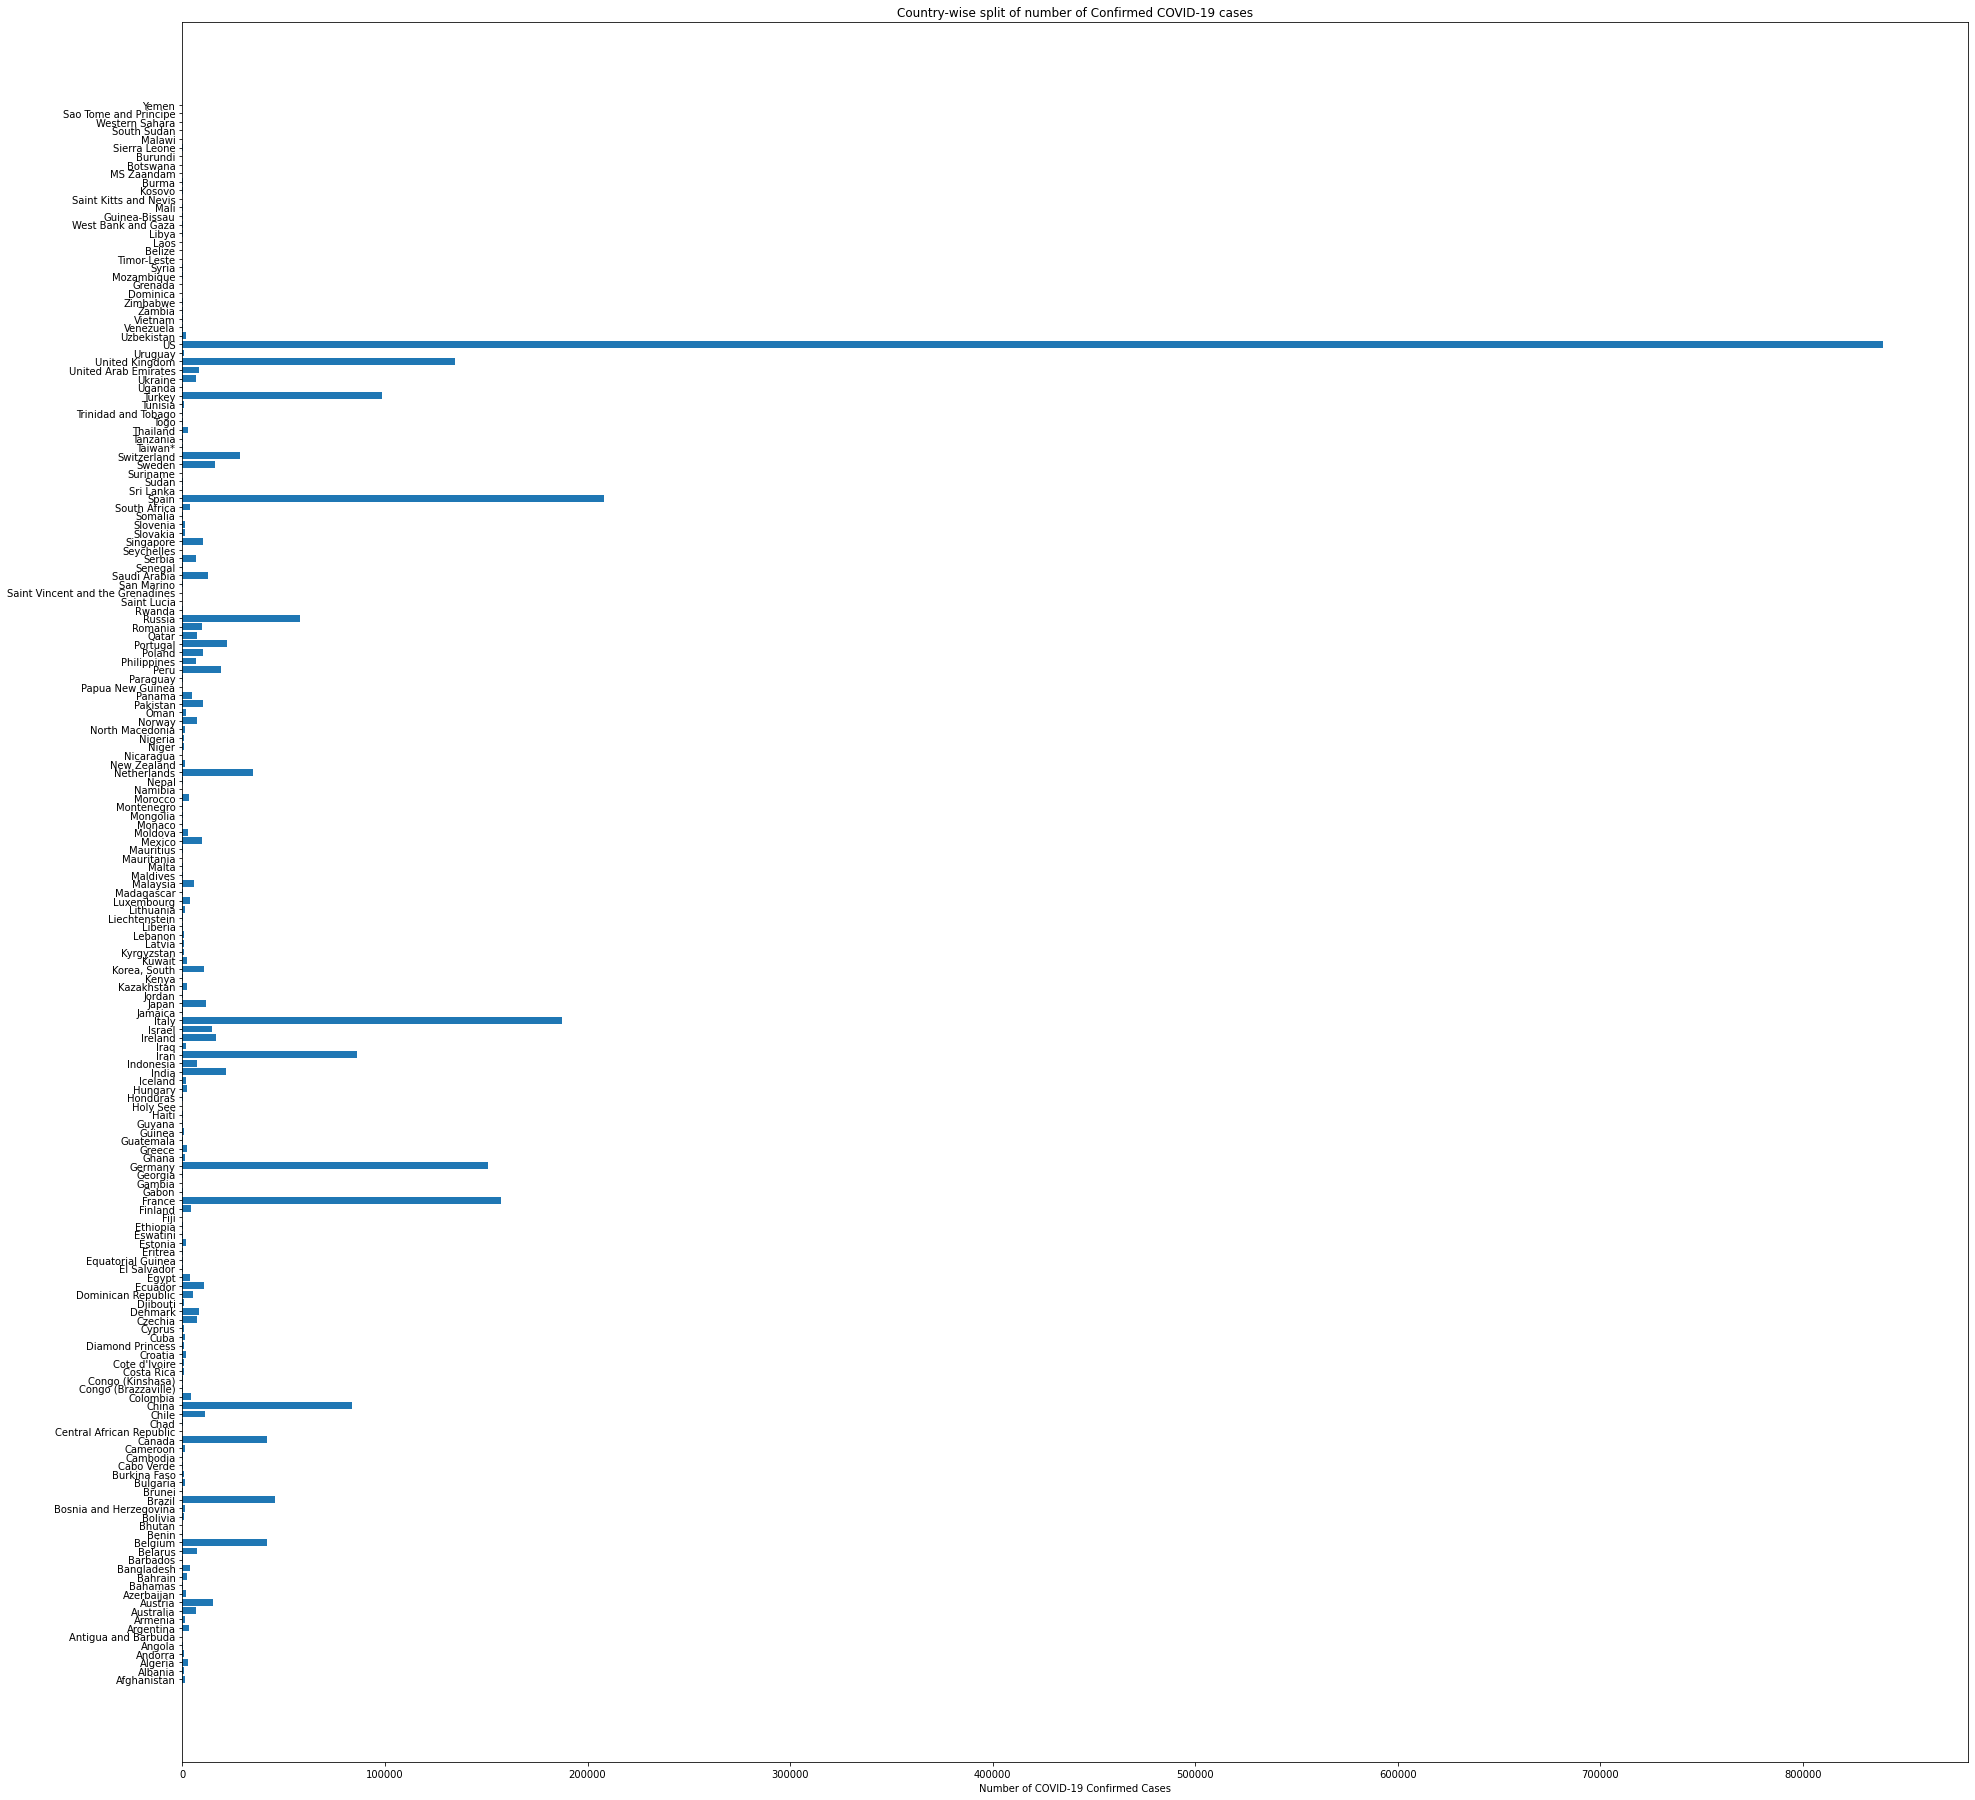

In [33]:
#Bar Graph of Total confirmed cases across different countries:

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Country-wise split of number of Confirmed COVID-19 cases')
plt.xlabel('Number of COVID-19 Confirmed Cases')
plt.show()

Note : Recent report and the above graph represents how worse the situation is in the United States.

So, let's compare the total cases in US vs Rest of the world 

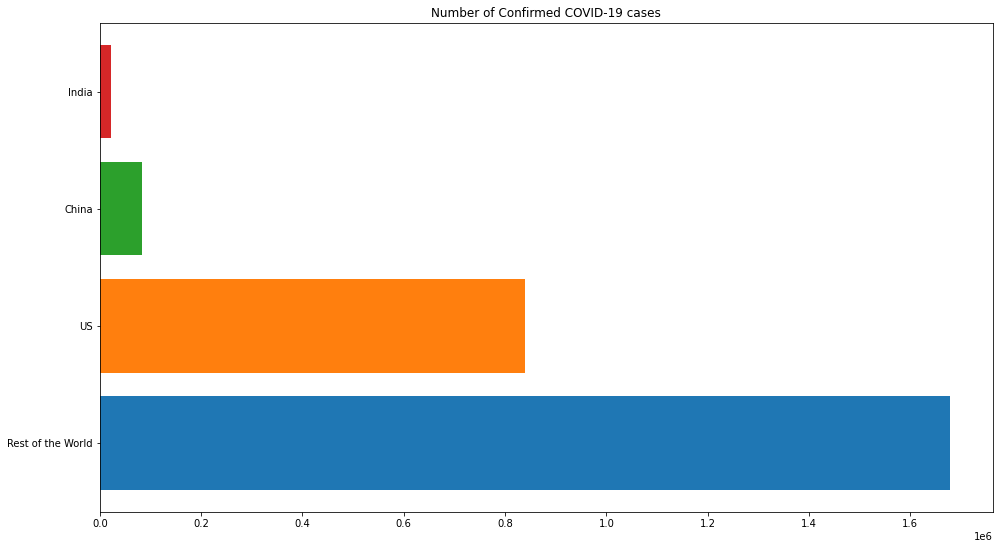

In [34]:
#COmparison of total confirmed cases in US, India and elsewhere

china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
us_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='US'].sum()
india_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='India'].sum()
rest_world_confirmed = np.sum(country_confirmed_cases) - us_confirmed - india_confirmed - china_confirmed

plt.figure(figsize = (16,9))
plt.barh('Rest of the World', rest_world_confirmed)
plt.barh('US', us_confirmed)
plt.barh('China', china_confirmed)
plt.barh('India', india_confirmed)
plt.title('Number of Confirmed COVID-19 cases')
plt.show()

In [35]:
print("Total cases confirmed Country wise: \n")
print("India: " + str(india_confirmed) + "\n")
print("China: " + str(china_confirmed) + "\n")
print("US: " + str(us_confirmed) + "\n")
print("Rest of the World: " + str(rest_world_confirmed) + "\n")

Total cases confirmed Country wise: 

India: 21370

China: 83868

US: 839675

Rest of the World: 1678500



In [36]:
df = pd.DataFrame({"Countries":unique_countries,
                  "Confirmed Cases":country_confirmed_cases})
df_sorted= df.sort_values('Confirmed Cases',ascending=False)
top_sorted = df_sorted[0:10]
top_sorted

,Countries,Confirmed Cases
156,US,839675
138,Spain,208389
77,Italy,187327
56,France,157125
60,Germany,150648
154,United Kingdom,134638
150,Turkey,98674
73,Iran,85996
32,China,83868
124,Russia,57999


In [37]:
#Showing top 10 countries with most Confirmed Cases

top_unique_countries = []
top_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    top_unique_countries.append(unique_countries[i])
    top_confirmed_cases.append(country_confirmed_cases[i])
    
top_unique_countries.append('Others')
top_confirmed_cases.append(others)


Text(0.5, 1.0, 'Top 10 countries with Confirmed Cases')

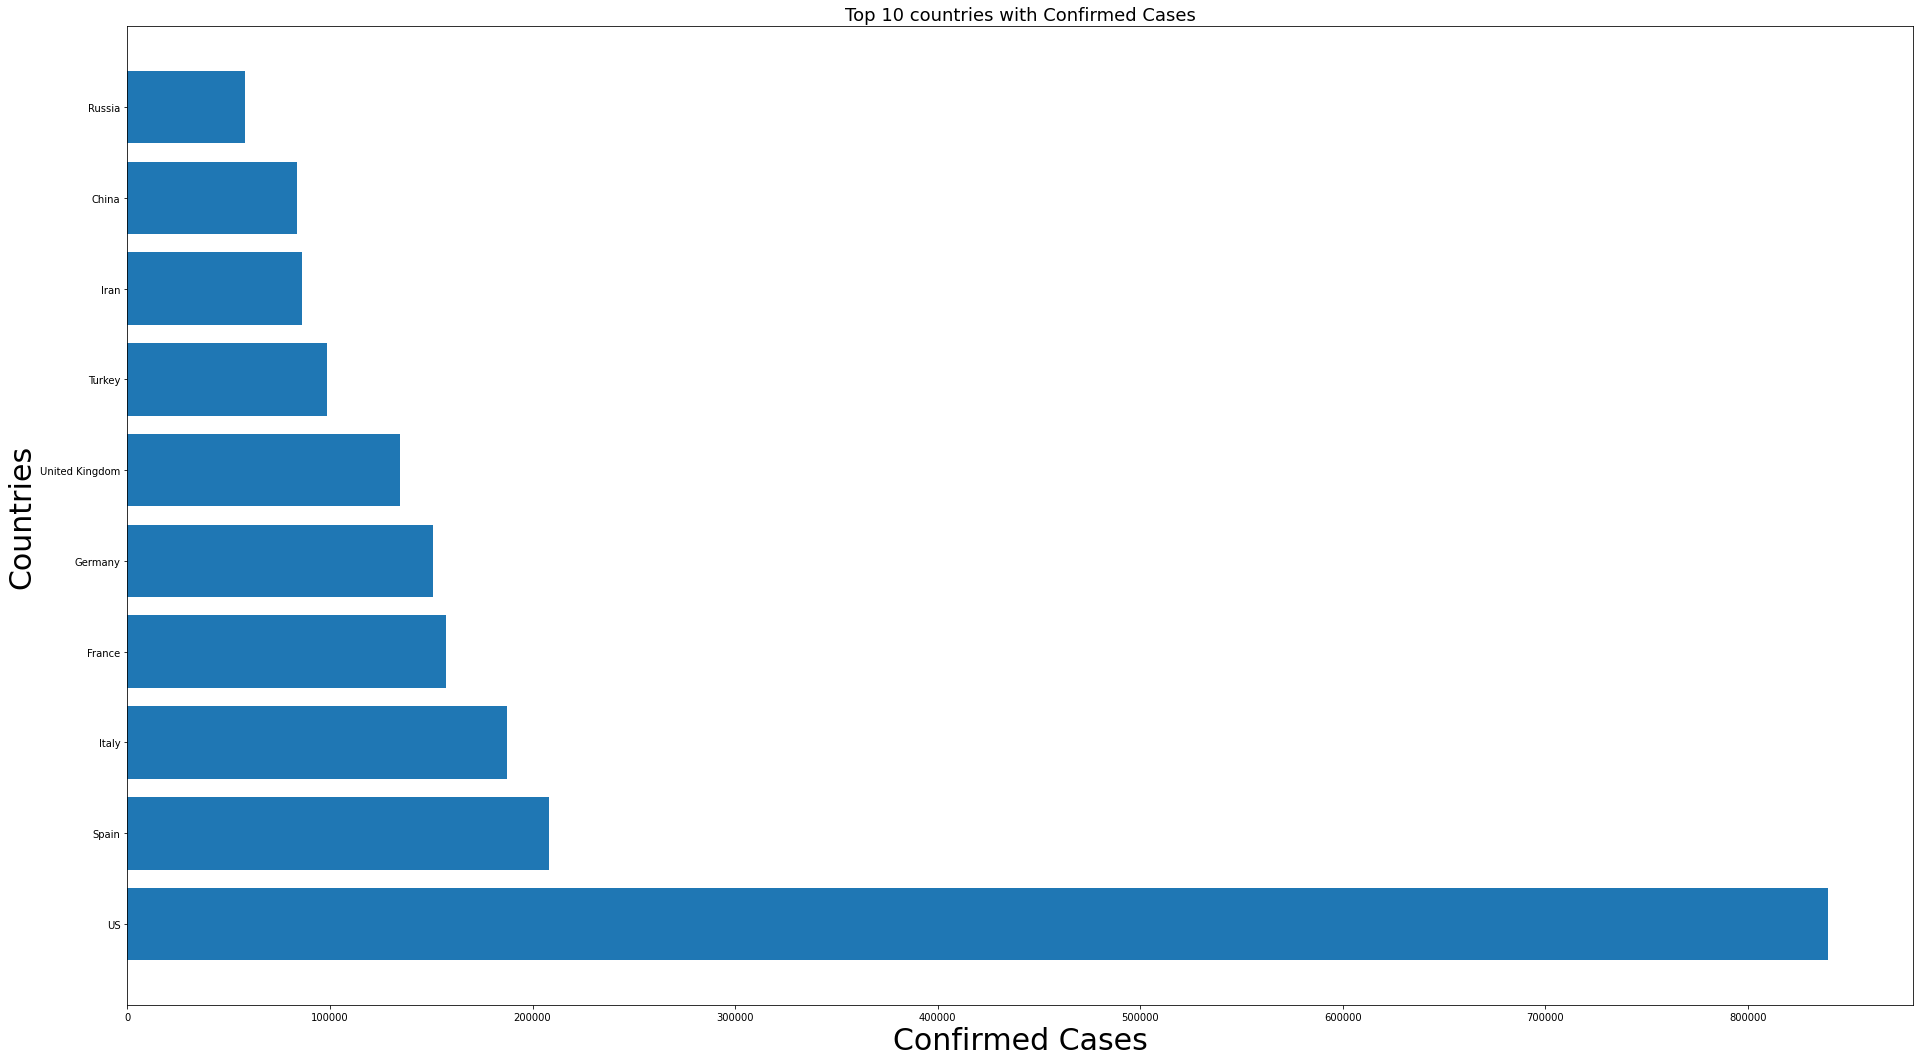

In [38]:
#Plotting the Top 10 countries:


plt.figure(figsize=(32,18))
# bar plot with matplotlib
plt.barh('Countries', 'Confirmed Cases',data=top_sorted)
plt.xlabel("Confirmed Cases", size=30)
plt.ylabel("Countries", size=30)
plt.title("Top 10 countries with Confirmed Cases", size=18)

In [39]:
top_sorted['Confirmed Cases']

156    839675
138    208389
77     187327
56     157125
60     150648
154    134638
150     98674
73      85996
32      83868
124     57999
Name: Confirmed Cases, dtype: int64

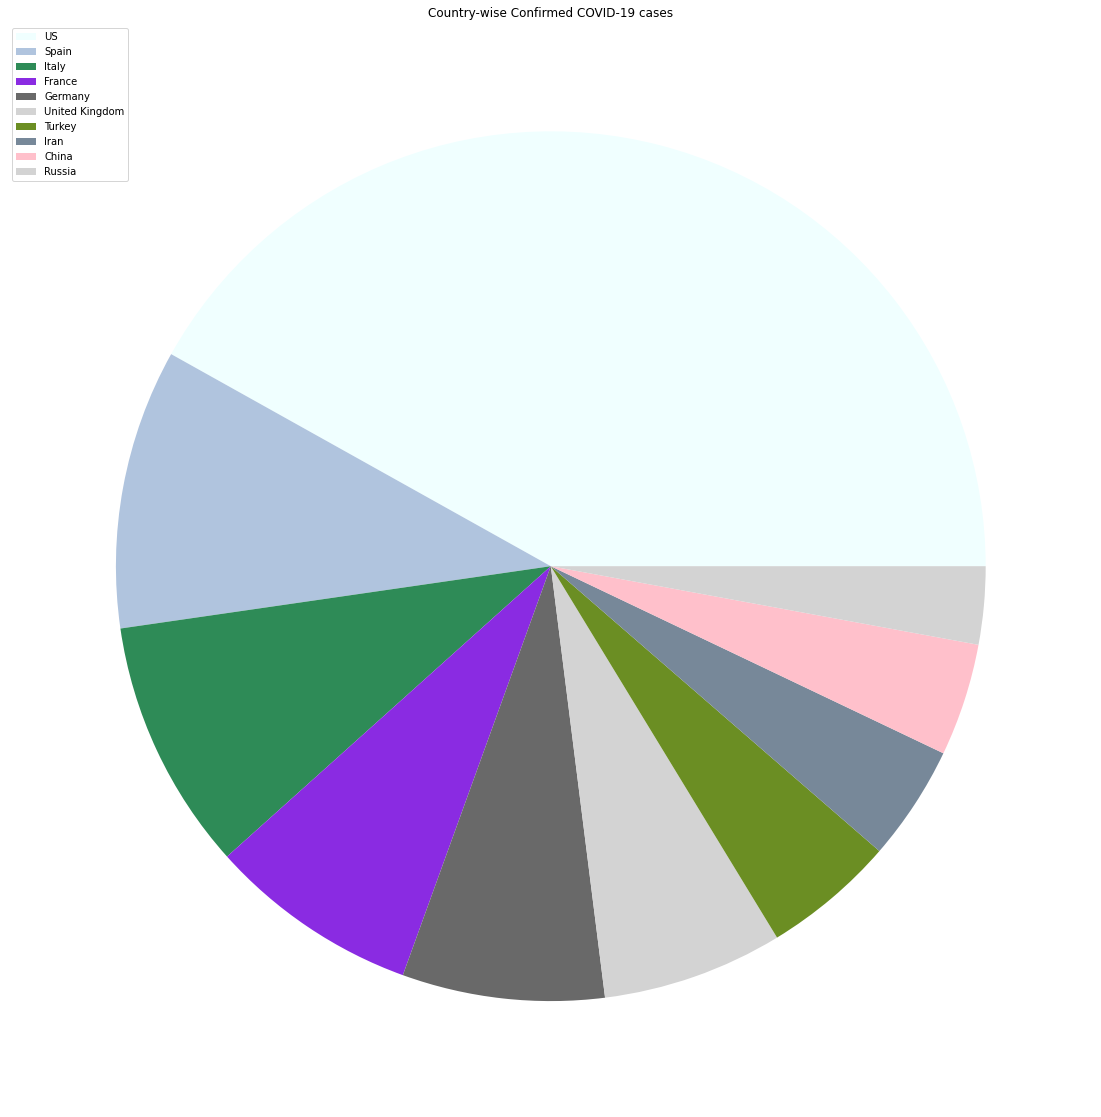

In [40]:
#Creating a Pie Chart

c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Country-wise Confirmed COVID-19 cases')
plt.pie(top_sorted['Confirmed Cases'], colors = c)
plt.legend(top_sorted['Countries'], loc='best')
plt.show()

#### Now that we have analysed the present data, we move towards setting up our Support Vector Machine(SVM) Model


In [41]:
global_covid_plot=pd.Series(days_since_jan22.flatten())
global_covid_plot

0      0
1      1
2      2
3      3
4      4
      ..
87    87
88    88
89    89
90    90
91    91
Length: 92, dtype: int64

In [42]:
global_covid_plot=global_covid_plot.to_frame()
global_covid_plot

,0
0,0
1,1
2,2
3,3
4,4
...,...
87,87
88,88
89,89
90,90


In [43]:
global_covid_plot['world active cases']=pd.Series(world_cases.flatten())
global_covid_plot

,0,world active cases
0,0,555
1,1,654
2,2,941
3,3,1434
4,4,2118
...,...,...
87,87,2317758
88,88,2401101
89,89,2472258
90,90,2549293


In [44]:
global_covid_plot['Global deaths']=pd.Series(total_deaths.flatten())
global_covid_plot['Global recovered cases']=pd.Series(total_recovered.flatten())
global_covid_plot

,0,world active cases,Global deaths,Global recovered cases
0,0,555,17,28
1,1,654,18,30
2,2,941,26,36
3,3,1434,42,39
4,4,2118,56,52
...,...,...,...,...
87,87,2317758,159509,592319
88,88,2401101,165043,623903
89,89,2472258,169985,645738
90,90,2549293,176582,679819


In [45]:
global_covid_plot = global_covid_plot.rename(columns= {0: 'Date'})
global_covid_plot

,Date,world active cases,Global deaths,Global recovered cases
0,0,555,17,28
1,1,654,18,30
2,2,941,26,36
3,3,1434,42,39
4,4,2118,56,52
...,...,...,...,...
87,87,2317758,159509,592319
88,88,2401101,165043,623903
89,89,2472258,169985,645738
90,90,2549293,176582,679819


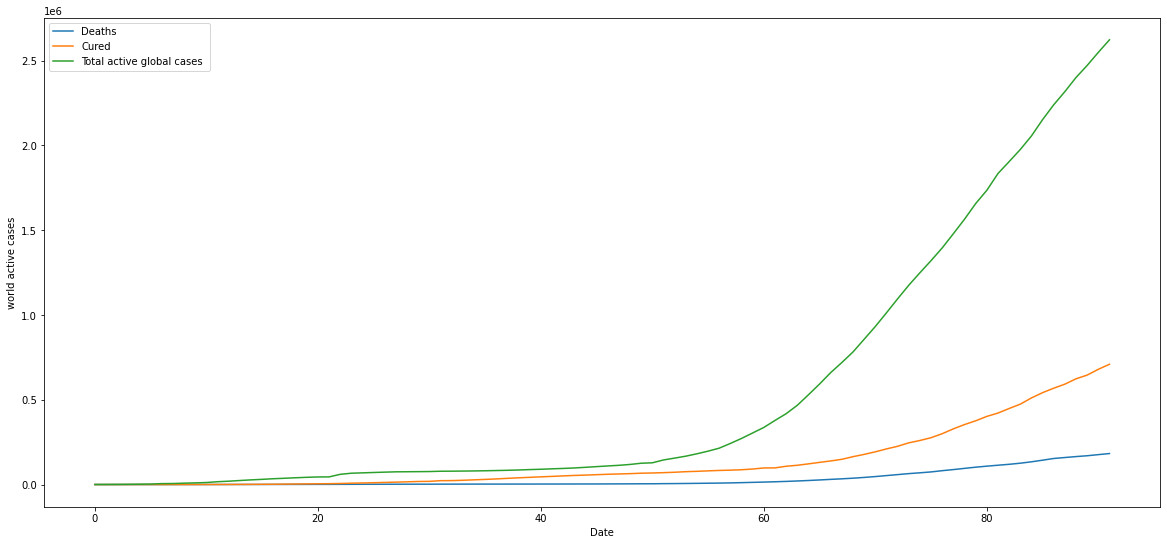

In [46]:
import seaborn as sb
plt.figure(figsize=(20,9))
sb.lineplot(data=global_covid_plot, x='Date',y='Global deaths', label="Deaths")
sb.lineplot(data=global_covid_plot, x='Date',y='Global recovered cases', label="Cured")
sb.lineplot(data=global_covid_plot, x='Date',y='world active cases', label="Total active global cases ")

In [47]:
#Defining Labels
X=days_since_jan22
Y=world_cases

#### Now that we have analysed the present data, we move towards setting up our Support Vector Machine(SVM) Model

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(days_since_jan22, world_cases, test_size=0.15, shuffle=False)

In [49]:
#fit LinearRegression to training set 
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()

#regressor is object which learns the relation and take data
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
Y_pred=regressor.predict(X_test)
Y_pred

array([[775451.2980353 ],
       [788504.39094239],
       [801557.48384948],
       [814610.57675658],
       [827663.66966367],
       [840716.76257076],
       [853769.85547786],
       [866822.94838495],
       [879876.04129204],
       [892929.13419913],
       [905982.22710623],
       [919035.32001332],
       [932088.41292041],
       [945141.50582751]])

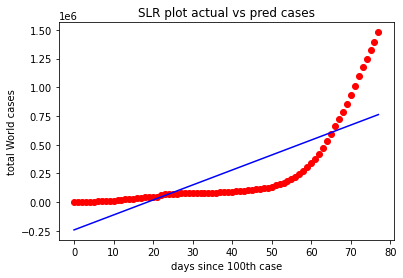

In [51]:
#visualize training test results 
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('SLR plot actual vs pred cases')
plt.xlabel('days since 100th case')
plt.ylabel('total World cases')
plt.show()

In [52]:
#Calculating RMSE Values
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_train, regressor.predict(X_train)))
rmse_test = sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))

In [53]:
print("Train Error: ")
print(rmse)
print("Test Error: ")
print(rmse_test)

Train Error: 
231287.51647099233
Test Error: 
1276168.7613026665


In [54]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

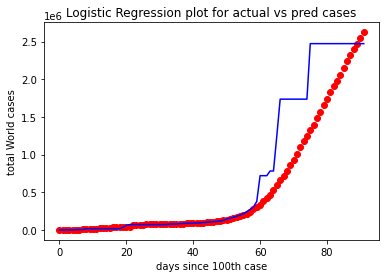

In [55]:
#visualize training test results 
plt.scatter(X, Y, color='red')
plt.plot(X, classifier.predict(X), color='blue')
plt.title('Logistic Regression plot for actual vs pred cases')
plt.xlabel('days since 100th case')
plt.ylabel('total World cases')
plt.show()

In [56]:
#Calculating RMSE Values
rmse_train_log = sqrt(mean_squared_error(Y_train, classifier.predict(X_train)))
rmse_test_log = sqrt(mean_squared_error(Y_test, classifier.predict(X_test)))

In [57]:
print("\nTrain RMSE: ")
print(rmse_train_log)
print("\nTest RMSE: ")
print(rmse_test_log)


Train RMSE: 
365536.09392935224

Test RMSE: 
492121.95362285094


In [58]:
#SVR regression testing
#feature scaling
from sklearn.preprocessing import StandardScaler
Y_sv=Y
Y_sv = np.array(Y_sv).reshape(-1,1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X_svr = sc_X.fit_transform(X)
Y_svr = sc_y.fit_transform(Y_sv)

In [59]:
print("X.shape is: ",X_svr.shape)
print("Y.shape is: ",Y_svr.shape)

X.shape is:  (92, 1)
Y.shape is:  (92, 1)


In [60]:
from sklearn.svm import SVR
svr_regressor=SVR(kernel='rbf')
#kernel defines linear, multiple SVR etc
svr_regressor.fit(X_svr,Y_svr)

/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
Y_pred_svr=svr_regressor.predict(X_svr)

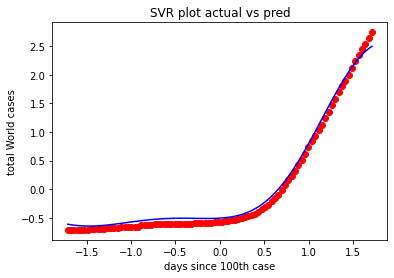

In [62]:
plt.scatter(X_svr, Y_svr, color = 'red')
plt.plot(X_svr, Y_pred_svr, color = 'blue')
plt.title('SVR plot actual vs pred')
plt.xlabel('days since 100th case')
plt.ylabel('total World cases')
plt.show()

In [63]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X_svr, Y_svr, test_size =0.15, random_state = 0)

In [64]:
rmse_train_svr = sqrt(mean_squared_error(Y_train, svr_regressor.predict(X_train)))
rmse_test_svr = sqrt(mean_squared_error(Y_test, svr_regressor.predict(X_test)))

print("\nTrain RMSE: ")
print(rmse_train_svr)
print("\nTest RMSE: ")
print(rmse_test_svr)


Train RMSE: 
0.08606041388906412

Test RMSE: 
0.08241278536739913


In [65]:
#MEasuring accuracy using Cross Validaion scores
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = svr_regressor, X = X_train, y = Y_train, cv = 10)

/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yash/projects/projects/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [69]:
print("The accuracy of prediction of SVR Model is: ",
accuracy.mean())

acc = accuracy.mean()

The accuracy of prediction of SVR Model is:  0.9678502190218824


In [70]:
print("Percentage accuracy of prediction model = ",(acc*100),"%")

Percentage accuracy of prediction model =  96.78502190218823 %
